In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
wtd = pd.read_csv('website_traffic_data.csv')
wtd.head(10)

,Title,Keyword,Keyword ID,Position,Previous position,Last Seen,Search Volume,CPC,Traffic,Traffic (%),Traffic Cost,Traffic Cost (%),Competition,Number of Results,Keyword Difficulty
0,PMP® Exam & Certification | Flat 40% Off - Enr...,PMP,3,1,1,2024-12-31,90500,3.76,4253,22.77,15991,24.66,0.60,166000000,78.0
1,PMP® Exam & Certification | Confidently Ace Th...,PMP,3,1,1,2025-01-01,90500,3.76,4253,22.77,15991,24.66,0.60,172000000,78.0
2,PMP® Training & Exam | Special Offer: Get $400...,PMP,3,1,2,2025-01-14,90500,3.82,1176,6.29,4492,6.92,0.65,154000000,77.0
3,CSM Scrum Master Course Online | Today's Offer...,Scrum Master,1,1,1,2025-01-10,18100,3.21,850,4.55,2728,4.20,0.64,32000000,70.0
4,PMP® Certification | Ace PMP Exam in 1st Attempt,PMP,3,3,3,2025-01-07,90500,3.82,814,4.35,3109,4.79,0.65,165000000,78.0
5,ITIL® 4 Certification Course | 100% Money Back...,ITIL,7,1,1,2025-01-26,14800,2.33,695,3.72,1619,2.49,0.49,13700000,55.0
6,PMP® Exam & Certification | Flat 40% Off - Enr...,PMP,3,4,4,2025-01-02,90500,3.76,633,3.39,2380,3.67,0.60,176000000,82.0
7,CSM Scrum Master Course Online | Today's Offer...,Scrum Master,1,1,1,2025-01-17,9900,3.21,465,2.49,1492,2.30,0.64,44200000,50.0
8,Scrum Alliance CSM® Training | Flash Sale: Enr...,Scrum Master,1,1,1,2024-12-28,9900,4.52,465,2.49,2101,3.24,0.43,51800000,57.0
9,PMP® Certification Course | Ace PMP Exam in 1s...,PMP,3,6,0,2025-01-26,90500,3.82,452,2.42,1726,2.66,0.65,155000000,70.0


In [3]:
wtd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               199 non-null    object 
 1   Keyword             199 non-null    object 
 2   Keyword ID          199 non-null    int64  
 3   Position            199 non-null    int64  
 4   Previous position   199 non-null    int64  
 5   Last Seen           199 non-null    object 
 6   Search Volume       199 non-null    int64  
 7   CPC                 199 non-null    float64
 8   Traffic             199 non-null    int64  
 9   Traffic (%)         199 non-null    float64
 10  Traffic Cost        199 non-null    int64  
 11  Traffic Cost (%)    199 non-null    float64
 12  Competition         199 non-null    float64
 13  Number of Results   199 non-null    int64  
 14  Keyword Difficulty  198 non-null    float64
dtypes: float64(5), int64(7), object(3)
memory usage: 23.4+ KB

In [4]:
wtd.describe()

,Keyword ID,Position,Previous position,Search Volume,CPC,Traffic,Traffic (%),Traffic Cost,Traffic Cost (%),Competition,Number of Results,Keyword Difficulty
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,1.990000e+02,198.000000
mean,5.216080,2.532663,2.391960,4711.608040,3.916985,93.829146,0.498945,325.819095,0.499347,0.381658,4.575325e+07,48.747475
std,2.905679,1.526761,1.559311,16003.015228,3.853916,446.718734,2.392012,1671.621365,2.578053,0.198629,1.462253e+08,16.954309
min,1.000000,1.000000,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,8.000000
25%,3.000000,1.000000,1.000000,70.000000,2.310000,0.500000,0.000000,0.000000,0.000000,0.185000,2.750000e+06,37.000000
50%,5.000000,2.000000,2.000000,170.000000,3.210000,3.000000,0.010000,7.000000,0.010000,0.410000,5.570000e+06,47.500000
75%,8.000000,4.000000,4.000000,1600.000000,4.485000,20.000000,0.100000,48.000000,0.070000,0.520000,3.170000e+07,60.000000
max,10.000000,6.000000,6.000000,90500.000000,46.860000,4253.000000,22.770000,15991.000000,24.660000,0.950000,1.400000e+09,97.000000


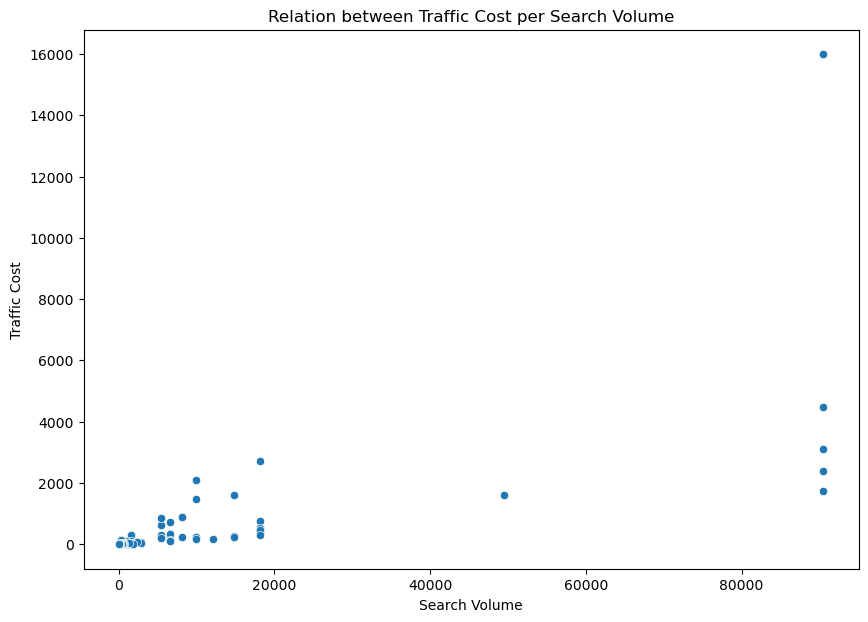

In [5]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=wtd,x='Search Volume',y='Traffic Cost')
plt.xlabel('Search Volume')
plt.ylabel('Traffic Cost')
plt.title('Relation between Traffic Cost per Search Volume')
plt.show()

In [7]:
# Since we are going to use Search Volume and Traffic Cost columns only, lets create 2D array of these columns for further use
X = wtd.iloc[:, [6,10]].values
X[:5] # Show first 5 records only

array([[90500, 15991],
       [90500, 15991],
       [90500,  4492],
       [18100,  2728],
       [90500,  3109]])

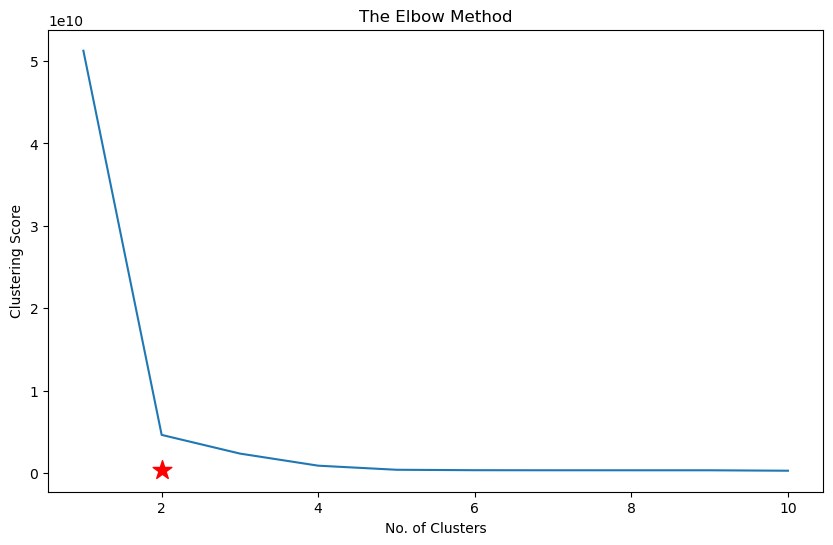

In [12]:
clustering_score = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random', random_state = 42)
    kmeans.fit(X)
    clustering_score.append(kmeans.inertia_) # inertia_ = Sum of squared distances of samples to their closest cluster center.
    

plt.figure(figsize=(10,6))
plt.plot(range(1, 11), clustering_score)
plt.scatter(2,clustering_score[4], s = 200, c = 'red', marker='*')
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('Clustering Score')
plt.show()

In [13]:
kmeans= KMeans(n_clusters = 2, random_state = 42)

# Compute k-means clustering
kmeans.fit(X)

# Compute cluster centers and predict cluster index for each sample.
pred = kmeans.predict(X)

pred

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0], dtype=int32)

In [14]:
wtd['Cluster'] = pd.DataFrame(pred, columns=['cluster'] )
print('Number of data points in each cluster= \n', wtd['Cluster'].value_counts())
wtd

Number of data points in each cluster= 
 Cluster
0    192
1      7
Name: count, dtype: int64


,Title,Keyword,Keyword ID,Position,Previous position,Last Seen,Search Volume,CPC,Traffic,Traffic (%),Traffic Cost,Traffic Cost (%),Competition,Number of Results,Keyword Difficulty,Cluster
0,PMP® Exam & Certification | Flat 40% Off - Enr...,PMP,3,1,1,2024-12-31,90500,3.76,4253,22.77,15991,24.66,0.60,166000000,78.0,1
1,PMP® Exam & Certification | Confidently Ace Th...,PMP,3,1,1,2025-01-01,90500,3.76,4253,22.77,15991,24.66,0.60,172000000,78.0,1
2,PMP® Training & Exam | Special Offer: Get $400...,PMP,3,1,2,2025-01-14,90500,3.82,1176,6.29,4492,6.92,0.65,154000000,77.0,1
3,CSM Scrum Master Course Online | Today's Offer...,Scrum Master,1,1,1,2025-01-10,18100,3.21,850,4.55,2728,4.20,0.64,32000000,70.0,0
4,PMP® Certification | Ace PMP Exam in 1st Attempt,PMP,3,3,3,2025-01-07,90500,3.82,814,4.35,3109,4.79,0.65,165000000,78.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,PMP® Exam & Certification - Flat 40% Off - Enr...,PMP,3,4,4,2024-12-31,40,7.75,0,0.00,0,0.00,0.61,28500000,31.0,0
195,Certified Scrum Product Owner® | Limited Offer...,Scrum Master,1,4,4,2025-01-16,90,2.62,0,0.00,0,0.00,0.39,512000,47.0,0
196,PMP® Certification Course,PMP,3,2,2,2025-01-22,50,2.61,0,0.00,0,0.00,0.24,21900000,46.0,0
197,TOGAF® Certification Exam Cost | TOGAF® Free E...,TOGAF,10,4,4,2025-01-13,30,1.94,0,0.00,0,0.00,0.30,384000,24.0,0


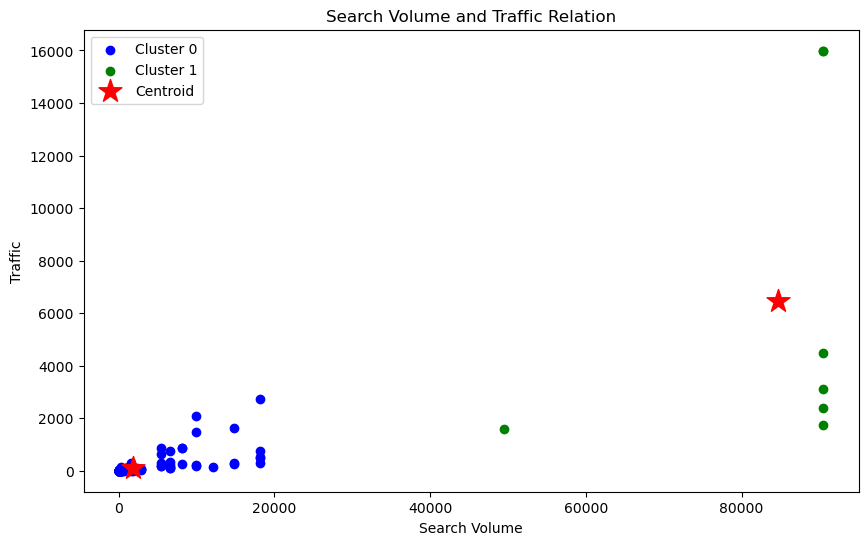

In [19]:
plt.figure(figsize=(10,6))
plt.scatter(X[pred == 0, 0], X[pred == 0, 1], c = 'blue', label = 'Cluster 0')
plt.scatter(X[pred == 1, 0], X[pred == 1, 1], c = 'green', label = 'Cluster 1')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1],s = 300, c = 'red', label = 'Centroid', marker='*')

plt.xlabel('Search Volume')
plt.ylabel('Traffic')
plt.legend()
plt.title('Search Volume and Traffic Relation')
plt.show()